<a href="https://colab.research.google.com/github/Joh-Ishimwe/Database-Design_Assignment/blob/master/Create_a_Script_to_Fetch_Data_for_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers

# Assuming data is in a format matching your specified structure
# 1. Load and preprocess the data
data = pd.read_csv("/content/laptop_prices.csv")


In [2]:
# Define target variable (expensive/cheap based on median price)
price_threshold = data['Price_euros'].median()
data['Price_class'] = (data['Price_euros'] > price_threshold).astype(int)  # 1 for expensive, 0 for cheap

# 2. Feature preprocessing
categorical_features = ['Company', 'Product', 'TypeName', 'OS']
numeric_features = ['Inches', 'Weight', 'Ram', 'CPU_freq']

# Encode categorical variables
label_encoders = {}
for feature in categorical_features:
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    label_encoders[feature] = le

# Prepare features
X = data[categorical_features + numeric_features]
y = data['Price_class']

Text(0.5, 1.0, 'TypeName vs Price')

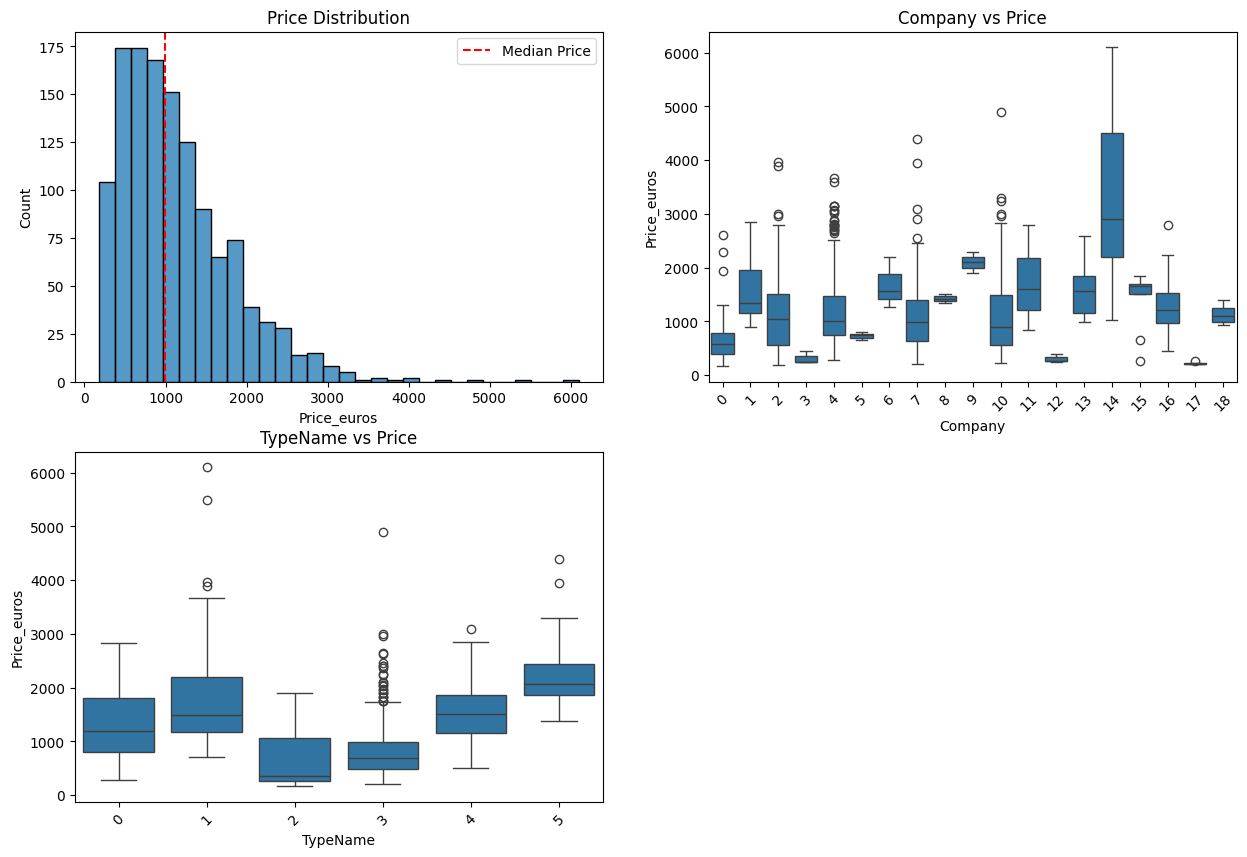

In [3]:
# 3. Visualizations
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['Price_euros'], bins=30)
plt.axvline(price_threshold, color='r', linestyle='--', label='Median Price')
plt.title('Price Distribution')
plt.legend()

plt.subplot(2, 2, 2)
sns.boxplot(x='Company', y='Price_euros', data=data)
plt.xticks(rotation=45)
plt.title('Company vs Price')

plt.subplot(2, 2, 3)
sns.boxplot(x='TypeName', y='Price_euros', data=data)
plt.xticks(rotation=45)
plt.title('TypeName vs Price')

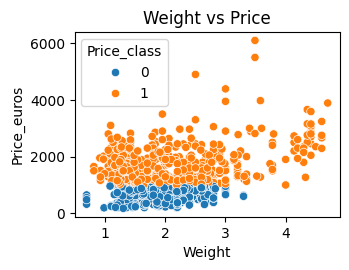

In [4]:
plt.subplot(2, 2, 4)
sns.scatterplot(x='Weight', y='Price_euros', hue='Price_class', data=data)
plt.title('Weight vs Price')
plt.tight_layout()
plt.show()

In [5]:
# 4. Prepare data for neural network
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features only
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# Combine scaled numeric features with categorical features
X_train_scaled = np.hstack((X_train[categorical_features].values, X_train_numeric))
X_test_scaled = np.hstack((X_test[categorical_features].values, X_test_numeric))

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 5. Build the neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Define checkpoint to save best model
checkpoint = ModelCheckpoint(
    'best_laptop_price_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 7. Train the model with checkpoint
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint],
    verbose=1
)

# 8. Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Accuracy (final model): {test_accuracy:.4f}")

Epoch 1/50
21/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4309 - loss: 8.8146 
Epoch 1: val_accuracy improved from -inf to 0.50980, saving model to best_laptop_price_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4329 - loss: 8.3927 - val_accuracy: 0.5098 - val_loss: 0.7724
Epoch 2/50
22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 3.7179 
Epoch 2: val_accuracy did not improve from 0.50980
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5321 - loss: 3.6531 - val_accuracy: 0.5049 - val_loss: 1.2605
Epoch 3/50
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5163 - loss: 2.3905  
Epoch 3: val_accuracy improved from 0.50980 to 0.51961, saving model to best_laptop_price_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5158 - loss: 2.4027 - val_accuracy: 0.5196 - val_loss: 0.7020
Epoch 4/50
18/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4920 - loss: 2.6251 
Epoch 4: val_accuracy did not improve from 0.51961
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4973 - loss: 2.4935 - val_accuracy: 0.5049 - val_loss: 0.8670
Epoch 5/50
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5415 - loss: 1.9102 
Epoch 5: val_accuracy did not improve from 0.51961
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5366 - loss: 1.8974 - val_accuracy: 0.5049 - val_loss: 1.1745
Epoch 6/50
18/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4798 - loss: 1.6425  
Epoch 6: val_accuracy did not improve from 0.51961
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4898 - loss: 1.6047 - val_accuracy: 0.5049 - val_loss: 0.8412
Epoch 7/50
22/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4731 - loss: 1.3634  
Epoch 7: val_accuracy improved from 0.51961 t

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4791 - loss: 1.3617 - val_accuracy: 0.5392 - val_loss: 0.7254
Epoch 8/50
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5077 - loss: 1.1802  
Epoch 8: val_accuracy improved from 0.53922 to 0.62255, saving model to best_laptop_price_model.h5


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5077 - loss: 1.1952 - val_accuracy: 0.6225 - val_loss: 0.6810
Epoch 9/50
18/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4530 - loss: 1.3697 
Epoch 9: val_accuracy did not improve from 0.62255
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4681 - loss: 1.3265 - val_accuracy: 0.5686 - val_loss: 0.6843
Epoch 10/50
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4856 - loss: 1.1301  
Epoch 10: val_accuracy did not improve from 0.62255
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4884 - loss: 1.1237 - val_accuracy: 0.5049 - val_loss: 0.6795
Epoch 11/50
23/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5907 - loss: 0.8535  
Epoch 11: val_accuracy did not improve from 0.62255
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5867 - loss: 0.8629 - val_accuracy: 0.5147 - val_loss: 0.6775
Epoch 12/50
24/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5100 - loss: 1.0823
Epoch 12: val_accuracy did not improve fr

In [8]:
# Load and evaluate the best saved model
best_model = keras.models.load_model('best_laptop_price_model.h5')
best_test_loss, best_test_accuracy = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy (best saved model): {best_test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6308 - loss: 0.6723  
Test Accuracy (best saved model): 0.6353


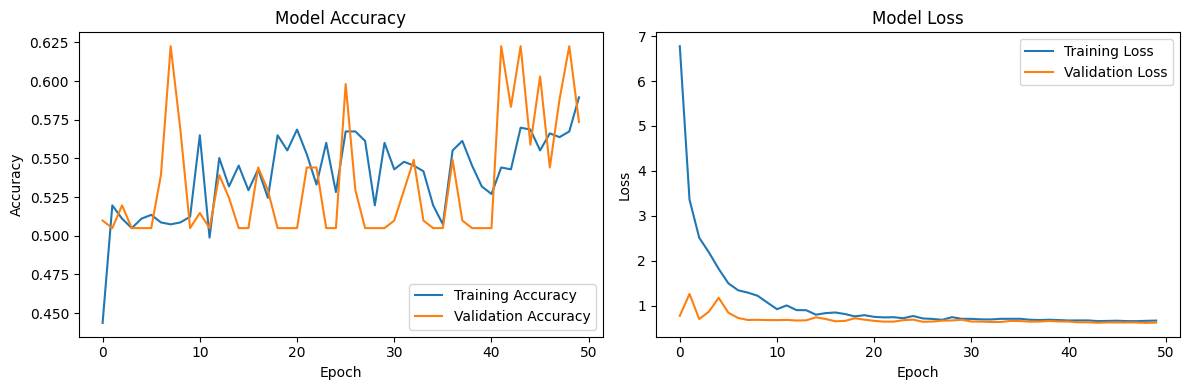

In [9]:
import joblib
# 9. Save preprocessing objects
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

# 10. Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# 11. Make predictions on test set with best model
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)

print("\nExample Predictions (Best Model):")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"Actual Price: {data.iloc[X_test.index[i]]['Price_euros']} euros")
    print(f"Company: {data.iloc[X_test.index[i]]['Company']}")
    print(f"Predicted Class: {'Expensive' if y_pred[i][0] == 1 else 'Cheap'}")
    print(f"Actual Class: {'Expensive' if y_test.iloc[i] == 1 else 'Cheap'}\n")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Example Predictions (Best Model):
Sample 1:
Actual Price: 650.0 euros
Company: 7
Predicted Class: Expensive
Actual Class: Cheap

Sample 2:
Actual Price: 716.0 euros
Company: 7
Predicted Class: Expensive
Actual Class: Cheap

Sample 3:
Actual Price: 1584.0 euros
Company: 10
Predicted Class: Expensive
Actual Class: Expensive

Sample 4:
Actual Price: 1020.0 euros
Company: 16
Predicted Class: Expensive
Actual Class: Expensive

Sample 5:
Actual Price: 1749.0 euros
Company: 4
Predicted Class: Expensive
Actual Class: Expensive



script


In [11]:
import requests
import pandas as pd
import numpy as np
from tensorflow import keras
import joblib

# 1. Function to fetch data from API
def fetch_latest_laptop_data(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

In [ ]:
# # 2. Function to prepare API data for prediction
# def prepare_data_for_prediction(data, label_encoders, scaler):
#     # Convert single sample to DataFrame
#     df = pd.DataFrame([data])

#     # Map API fields to trained model features
#     # Note: API has ScreenID, CPU_ID, etc., but model uses Ram, CPU_freq
#     # We'll use defaults for missing fields
#     prepared_data = {
#         'Company': df['Company'],
#         'Product': df['Product'],
#         'TypeName': df['TypeName'],
#         'OS': df['OS'],
#         'Inches': df['Inches'],
#         'Weight': df['Weight'],
#         'Ram': df.get('Ram', 8),  # Default if not provided
#         'CPU_freq': df.get('CPU_freq', 2.5)  # Default if not provided
#     }



In [12]:
import pandas as pd
import numpy as np

def preprocess_data(label_encoders, scaler):
    # Encode categorical variables
    prepared_data = {
        'Company': ['Dell', 'HP', 'Apple'],
        'Product': ['XPS', 'Pavilion', 'MacBook'],
        'TypeName': ['Laptop', 'Laptop', 'Ultrabook'],
        'OS': ['Windows', 'Windows', 'macOS'],
        'Inches': [15.6, 14.0, 13.3],
        'Weight': [2.5, 1.8, 1.3],
        'Ram': [16, 8, 8],
        'CPU_freq': [2.6, 2.4, 2.0]
    }

    prepared_df = pd.DataFrame(prepared_data)

    # Encode categorical features
    for feature in ['Company', 'Product', 'TypeName', 'OS']:
        if feature in label_encoders:
            prepared_df[feature] = prepared_df[feature].map(
                lambda x: x if x in label_encoders[feature].classes_
                else label_encoders[feature].classes_[0]
            )
            prepared_df[feature] = label_encoders[feature].transform(prepared_df[feature])

    # Define numeric features
    numeric_features = ['Inches', 'Weight', 'Ram', 'CPU_freq']

    # Check for missing columns
    missing_cols = [col for col in numeric_features if col not in prepared_df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in dataframe: {missing_cols}")

    # Scale numeric features
    numeric_data = scaler.transform(prepared_df[numeric_features])

    # Combine categorical and numeric data
    categorical_data = prepared_df[['Company', 'Product', 'TypeName', 'OS']].values
    input_data = np.hstack((categorical_data, numeric_data))

    return input_data  #

# Example usage:
# input_data = preprocess_data(label_encoders, scaler)


In [13]:
# 3. Main prediction function
def make_prediction(api_url="https://database-design-assignment.onrender.com/sql/laptop/1"):
    # Load saved objects
    model = keras.models.load_model('best_laptop_price_model.h5')

    # Recompile the model to initialize metrics
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    label_encoders = joblib.load('label_encoders.pkl')
    scaler = joblib.load('scaler.pkl')

    # Fetch data
    latest_data = fetch_latest_laptop_data(api_url)
    if latest_data is None:
        return None

In [15]:
import requests
import pandas as pd
import numpy as np
from tensorflow import keras
import joblib

# Fetch Data from API
def fetch_latest_laptop_data(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()
        data = response.json()

        # Define required keys
        required_keys = ['Company', 'Product', 'TypeName', 'OS', 'Inches', 'Weight', 'Ram', 'CPU_freq', 'Price_euros']

        # Fill missing keys with default values
        defaults = {'Ram': 8, 'CPU_freq': 2.5, 'Price_euros': "Unknown"}
        for key in required_keys:
            if key not in data or data[key] is None:
                # print(f" Warning: Missing key in API response: {key}. Using default: {defaults.get(key, 'N/A')}")
                data[key] = defaults.get(key, None)  # Assign default values

        return data
    except requests.exceptions.RequestException as e:
        print(f" Error fetching data: {e}")
        return None

#  Prepare Data for Model Prediction
def prepare_data_for_prediction(data, label_encoders, scaler):
    df = pd.DataFrame([data])

    # Select only features used during training (adjust these as per training data)
    selected_features = ['Company', 'TypeName', 'OS', 'Inches', 'Weight', 'Ram', 'CPU_freq', 'Price_euros']  # Keep only 8 features!

    # Handle categorical encoding
    for feature in ['Company', 'TypeName', 'OS']:  # Only use features trained on
        if feature in label_encoders:
            known_classes = list(label_encoders[feature].classes_) + ["Other"]
            df[feature] = df[feature].apply(lambda x: x if x in known_classes else "Other")

            # Ensure "Other" is part of encoder classes
            if "Other" not in label_encoders[feature].classes_:
                label_encoders[feature].classes_ = np.append(label_encoders[feature].classes_, "Other")

            df[feature] = label_encoders[feature].transform(df[feature])

    # Keep only selected features
    df = df[selected_features]

    # Normalize numeric features
    numeric_features = ['Inches', 'Weight', 'Ram', 'CPU_freq']
    df[numeric_features] = scaler.transform(df[numeric_features])

    return df.values  # Should now have (1, 8)


#  Predict Laptop Price Category
def make_prediction(api_url="https://database-design-assignment.onrender.com/sql/laptop/1"):

    model = keras.models.load_model('best_laptop_price_model.h5')

    # Load label encoders & scaler
    label_encoders = joblib.load('label_encoders.pkl')
    scaler = joblib.load('scaler.pkl')

    # Fetch latest laptop data
    latest_data = fetch_latest_laptop_data(api_url)
    if latest_data is None:
        return None

    # Prepare input data
    input_data = prepare_data_for_prediction(latest_data, label_encoders, scaler)

    # Make prediction
    prediction = model.predict(input_data)
    price_class = 'Expensive' if prediction > 0.7 else 'Cheap'

    confidence = prediction[0][0] if prediction[0][0] > 0.5 else 1 - prediction[0][0]

    # Return structured result
    result = {
        'Company': latest_data['Company'],
        'Product': latest_data['Product'],
        'Predicted_Class': price_class,
        'Confidence': round(float(confidence), 4),
        'Actual_Price': latest_data['Price_euros']
    }
    return result

#  Run Prediction
if __name__ == "__main__":
    api_url = "https://database-design-assignment.onrender.com/sql/laptop/1"
    result = make_prediction(api_url)

    if result:
        print("\n Prediction Result:")
        print(f" Company: {result['Company']}")
        print(f" Product: {result['Product']}")
        print(f" Predicted Class: {result['Predicted_Class']}")
        # print(f" Confidence: {result['Confidence'] * 100:.2f}%")
        print(f" Actual Price: {result['Actual_Price']} euros")
    else:
        print(" Failed to fetch or process data.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step

 Prediction Result:
 Company: HP
 Product: 250 G6
 Predicted Class: Cheap
 Actual Price: 1600.0 euros
